## import modules

In [16]:
!pip install torch==1.12
!pip install torchvision==0.13
!pip install matplotlib==3.5.2

1.12.0
0.13.0
3.7


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

## define model architecture

In [2]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 is basically 12 X 12 X 32
        self.fc2 = nn.Linear(64, 10)
 
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op

## define training and inference routines

In [3]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y) # nll is the negative likelihood loss
        loss.backward()
        optim.step()
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                epoch, b_i * len(X), len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader), loss.item()))


In [4]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()  # loss summed across the batch
            pred = pred_prob.argmax(dim=1, keepdim=True)  # us argmax to get the most likely prediction
            success += pred.eq(y.view_as(pred)).sum().item()

    loss /= len(test_dataloader.dataset)

    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, success, len(test_dataloader.dataset),
        100. * success / len(test_dataloader.dataset)))


## create data loaders

In [5]:
# The mean and standard deviation values are calculated as the mean of all pixel values of all images in the training dataset
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
    batch_size=32, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,)) 
                   ])),
    batch_size=500, shuffle=False)

## define optimizer and run training epochs

In [6]:
torch.manual_seed(0)
device = torch.device("cpu")

model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

## model training

In [7]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

/Users/ashish.jha/opt/anaconda3/envs/mastering_pytorch/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


epoch: 1 [0/60000 (0%)]	 training loss: 2.310609
epoch: 1 [320/60000 (1%)]	 training loss: 1.924133
epoch: 1 [640/60000 (1%)]	 training loss: 1.313336
epoch: 1 [960/60000 (2%)]	 training loss: 0.796470
epoch: 1 [1280/60000 (2%)]	 training loss: 0.819801
epoch: 1 [1600/60000 (3%)]	 training loss: 0.678430
epoch: 1 [1920/60000 (3%)]	 training loss: 0.477187
epoch: 1 [2240/60000 (4%)]	 training loss: 0.529062
epoch: 1 [2560/60000 (4%)]	 training loss: 0.468829
epoch: 1 [2880/60000 (5%)]	 training loss: 0.242887
epoch: 1 [3200/60000 (5%)]	 training loss: 0.519632
epoch: 1 [3520/60000 (6%)]	 training loss: 0.262917
epoch: 1 [3840/60000 (6%)]	 training loss: 0.467169
epoch: 1 [4160/60000 (7%)]	 training loss: 0.424967
epoch: 1 [4480/60000 (7%)]	 training loss: 0.316685
epoch: 1 [4800/60000 (8%)]	 training loss: 0.497946
epoch: 1 [5120/60000 (9%)]	 training loss: 0.154707
epoch: 1 [5440/60000 (9%)]	 training loss: 0.371073
epoch: 1 [5760/60000 (10%)]	 training loss: 0.083154
epoch: 1 [6080/60

epoch: 1 [48960/60000 (82%)]	 training loss: 0.064825
epoch: 1 [49280/60000 (82%)]	 training loss: 0.186619
epoch: 1 [49600/60000 (83%)]	 training loss: 0.234463
epoch: 1 [49920/60000 (83%)]	 training loss: 0.135859
epoch: 1 [50240/60000 (84%)]	 training loss: 0.060284
epoch: 1 [50560/60000 (84%)]	 training loss: 0.006255
epoch: 1 [50880/60000 (85%)]	 training loss: 0.006335
epoch: 1 [51200/60000 (85%)]	 training loss: 0.230939
epoch: 1 [51520/60000 (86%)]	 training loss: 0.028286
epoch: 1 [51840/60000 (86%)]	 training loss: 0.009054
epoch: 1 [52160/60000 (87%)]	 training loss: 0.015087
epoch: 1 [52480/60000 (87%)]	 training loss: 0.012862
epoch: 1 [52800/60000 (88%)]	 training loss: 0.037046
epoch: 1 [53120/60000 (89%)]	 training loss: 0.027532
epoch: 1 [53440/60000 (89%)]	 training loss: 0.015318
epoch: 1 [53760/60000 (90%)]	 training loss: 0.067134
epoch: 1 [54080/60000 (90%)]	 training loss: 0.015243
epoch: 1 [54400/60000 (91%)]	 training loss: 0.090634
epoch: 1 [54720/60000 (91%)]

epoch: 2 [37440/60000 (62%)]	 training loss: 0.004772
epoch: 2 [37760/60000 (63%)]	 training loss: 0.067643
epoch: 2 [38080/60000 (63%)]	 training loss: 0.014400
epoch: 2 [38400/60000 (64%)]	 training loss: 0.029562
epoch: 2 [38720/60000 (65%)]	 training loss: 0.091197
epoch: 2 [39040/60000 (65%)]	 training loss: 0.013406
epoch: 2 [39360/60000 (66%)]	 training loss: 0.004593
epoch: 2 [39680/60000 (66%)]	 training loss: 0.168198
epoch: 2 [40000/60000 (67%)]	 training loss: 0.011329
epoch: 2 [40320/60000 (67%)]	 training loss: 0.245803
epoch: 2 [40640/60000 (68%)]	 training loss: 0.528659
epoch: 2 [40960/60000 (68%)]	 training loss: 0.044822
epoch: 2 [41280/60000 (69%)]	 training loss: 0.083322
epoch: 2 [41600/60000 (69%)]	 training loss: 0.153098
epoch: 2 [41920/60000 (70%)]	 training loss: 0.009117
epoch: 2 [42240/60000 (70%)]	 training loss: 0.011295
epoch: 2 [42560/60000 (71%)]	 training loss: 0.046957
epoch: 2 [42880/60000 (71%)]	 training loss: 0.005710
epoch: 2 [43200/60000 (72%)]

## run inference on trained model

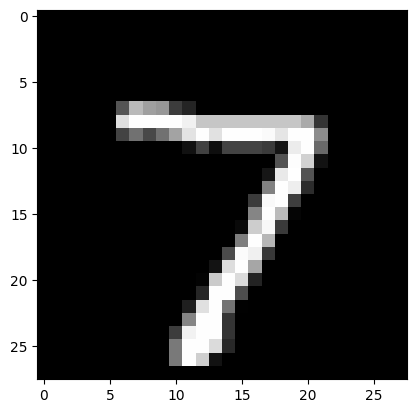

In [8]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

In [9]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 7
Ground truth is : 7


# PROFILING STARTS HERE

In [61]:
print(model)

ConvNet(
  (cn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (cn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dp1): Dropout2d(p=0.1, inplace=False)
  (dp2): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=4608, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [69]:
print(sample_data.shape)

torch.Size([500, 1, 28, 28])


## profile model inference on cpu

### cpu time

##### expand notebook to visualise traces properly

In [45]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
from torch.profiler import profile, record_function, ProfilerActivity

In [70]:
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    with record_function("model_inference"):
        model(sample_data)

In [73]:
print(prof.key_averages().table(sort_by="cpu_time_total"))

---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  model_inference         6.06%       6.256ms        99.99%     103.238ms     103.238ms             1  
                     aten::conv2d         0.01%       8.000us        45.74%      47.229ms      23.614ms             2  
                aten::convolution         0.03%      31.000us        45.73%      47.221ms      23.610ms             2  
               aten::_convolution         0.02%      17.000us        45.70%      47.190ms      23.595ms             2  
         aten::mkldnn_convolution        45.67%      47.160ms        45.69%      47.173ms      23.587ms             2  
                 aten::max_pool2d       

In [75]:
print(prof.key_averages(group_by_input_shape=True).table(sort_by="cpu_time_total"))

---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  --------------------------------------------------------------------------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls                                                                      Input Shapes  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  --------------------------------------------------------------------------------  
                  model_inference         6.06%       6.256ms        99.99%     103.238ms     103.238ms             1                                                                                []  
                     aten::conv2d         0.00%       4.000us        39.62%      40.910ms      40.910ms             1                         [[500, 16, 26, 26], [32, 16, 3, 3], [32], [], [], 

### cpu memory

In [78]:
with profile(activities=[ProfilerActivity.CPU],
        profile_memory=True, record_shapes=True) as prof:
    model(sample_data)

print(prof.key_averages().table(sort_by="cpu_memory_usage"))

---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                       aten::relu         0.04%      37.000us         8.04%       8.232ms       2.744ms      55.91 Mb           0 b             3  
                  aten::clamp_min         8.01%       8.195ms         8.01%       8.195ms       2.732ms      55.91 Mb      55.91 Mb             3  
                     aten::conv2d         0.01%       8.000us        51.31%      52.507ms      26.253ms      55.79 Mb           0 b             2  
                aten::convolution         0.04%      37.000us        51.30%      52.499ms      26.250ms      55.

### gpu time

In [80]:
model=model.cuda()
sample_data=sample_data.cuda()
with profile(activities=[
        ProfilerActivity.CPU, ProfilerActivity.CUDA], record_shapes=True) as prof:
    with record_function("model_inference"):
        model(sample_data)

print(prof.key_averages().table(sort_by="cuda_time_total"))

---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                      aten::zeros         0.04%      69.000us         0.07%     117.000us     117.000us             1  
                      aten::empty         0.07%     112.000us         0.07%     112.000us      18.667us             6  
                      aten::zero_         0.00%       1.000us         0.00%       1.000us       1.000us             1  
                  model_inference         5.20%       8.829ms        99.93%     169.727ms     169.727ms             1  
                     aten::conv2d         0.01%      22.000us        60.81%     103.277ms      51.639ms             2  
                aten::convolution       

## tracing

In [17]:
with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA]) as prof:
    model(sample_data)

prof.export_chrome_trace("trace.json")